In [14]:
import json
import os

In [15]:
with open('/Users/hima95/Downloads/Output__spatialise-dataset_Apr-25_11_04-2/data3159033140009759250.json', 'r') as fp:
    data = json.load(fp)

In [16]:
data.keys()

dict_keys(['type', 'crs', 'features'])

In [17]:
features = data['features']

In [18]:
len(features)

89

In [19]:
features[0].keys()

dict_keys(['type', 'geometry', 'properties', 'id'])

In [20]:
features[4]['properties']

{'feature_code': '105',
 'feature_name': 'Far West and Orana',
 'median_age_persons': 41,
 'median_tot_hhd_inc_weekly': 1106,
 'median_tot_prsnl_inc_weekly': 594,
 'sa4_code16': '105',
 'sa4_name16': 'Far West and Orana'}

In [21]:
for i in range(len(features)):
    
    print(i,'\t',features[i]['properties']['feature_name'] ,'\t',len(features[i]['geometry']['coordinates']))


0 	 Capital Region 	 109
1 	 Central Coast 	 4
2 	 Central West 	 1
3 	 Coffs Harbour - Grafton 	 26
4 	 Far West and Orana 	 1
5 	 Hunter Valley exc Newcastle 	 42
6 	 Illawarra 	 7
7 	 Mid North Coast 	 40
8 	 Murray 	 1
9 	 New England and North West 	 1
10 	 Newcastle and Lake Macquarie 	 7
11 	 Richmond - Tweed 	 9
12 	 Riverina 	 1
13 	 Southern Highlands and Shoalhaven 	 4
14 	 Sydney - Baulkham Hills and Hawkesbury 	 2
15 	 Sydney - Blacktown 	 1
16 	 Sydney - City and Inner South 	 3
17 	 Sydney - Eastern Suburbs 	 5
18 	 Sydney - Inner South West 	 1
19 	 Sydney - Inner West 	 2
20 	 Sydney - North Sydney and Hornsby 	 3
21 	 Sydney - Northern Beaches 	 3
22 	 Sydney - Outer South West 	 1
23 	 Sydney - Outer West and Blue Mountains 	 1
24 	 Sydney - Parramatta 	 1
25 	 Sydney - Ryde 	 1
26 	 Sydney - South West 	 1
27 	 Sydney - Sutherland 	 1
28 	 Ballarat 	 1
29 	 Bendigo 	 1
30 	 Geelong 	 5
31 	 Hume 	 1
32 	 Latrobe - Gippsland 	 108
33 	 Melbourne - Inner 	 1
34 	 Melb

In [22]:
from shapely.geometry import Point, Polygon

In [44]:
def geo_check(input_polygon):
    
    input_polygon = [input_polygon]
    if len(input_polygon)==1:
        pnt = Point(input_polygon[0])
        
    if len(input_polygon)>1:
        coordinate_polygon = Polygon(input_polygon)
        pnt = Point(coordinate_polygon.centriod)
        
    for i in range(len(features)):
        for j in range(len(features[i]['geometry']['coordinates'])):
     
            poly = Polygon(features[i]['geometry']['coordinates'][j][0])
            
            if pnt.within(poly):
                return {'SA4_name':features[i]['properties']['feature_name'],'SA4_code':features[i]['properties']['sa4_code16']}
                break
            
            if poly.contains(pnt):
                return {'SA4_name':features[i]['properties']['feature_name'],'SA4_code':features[i]['properties']['sa4_code16']}
                break
            

In [46]:
print(geo_check([124.39229201049999, -15.3314680084999]))

{'SA4_name': 'Western Australia - Outback (North)', 'SA4_code': '510'}


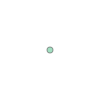